# Ray Plane Intersect
###### *Finding the four corner coordinates of drone imagery*

## Objectives
- Find where a ray intersects a plane (Ray plane intersect)
- Plot the rays of a camera
- Rotate the rays of a camera (Rotation matrix)

Let's firt import our libraries

In [1]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math as math

## Ray Plane Intersect
We can test if a camera with origin $r_{O}$ and direction $d$ intersects a plane with origin $P_{O}$ using the following formula.

Where $P$ is the point of interesect and $t$ is the ?distance? between $r_{0}$ and $P$.

First we must define the oritentation of the plane, or the plane normal $n$. For this example $z$ is inthe up direction or $n = [0,0,1]$

$P = r_{O} + (d*t)$

$t=\frac{(P_{O}-r_{O})\bullet n}{d\bullet n}$ 

Below we have created two methods to calculate the Ray Plane Intersect and plot the data to help use visualize what's going on. 

## Questions
- is $t$ the distance between $r_{0}$ and $P$?
- are $d$ and $n$ define the same way. 

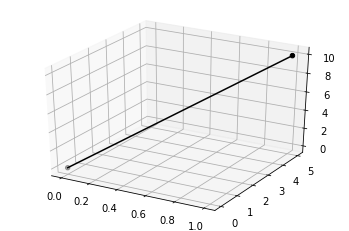

In [2]:
def plot(camera_origin, plane_origin, ax):  
    
    data = np.concatenate(([camera_origin], [plane_origin]))

    x, y, z = data.T

    ax.scatter3D(x, y, z, c="black", cmap='hsv');
    ax.plot(x, y, z, c="black")
    
def intersect(camera_origin, direction, plane_origin, normal):   

    # Zero (or close to it) means ray and plane are orthogonal (do not intersect)
    if abs(np.dot(direction, normal)) > 0.0001:
        t = (np.divide(np.dot(np.subtract(plane_origin, camera_origin), normal), np.dot(direction, normal)))
        p = np.add(camera_origin ,np.multiply(direction, t))
        
        print(f"Camera {camera_origin} with direction {direction} intersects the plane at {p}. Orthogonal value is {np.dot(direction, normal)}")
        
        return True, p
    else:
        return False, None

# Example
camera_origin = np.array([1, 5, 10])
plane_origin = np.array([0, 0, 0])

fig = plt.figure()
ax = plt.axes(projection='3d')
plot(camera_origin, plane_origin, ax)

# Understanding Direction
Direction $d$ is an $[x,y,z]$ coordinate. But I'm not quite sure what it does.

Lets explore the direction coordinates a little more.

## Changing one direction coordinate

In this example we pass an array of directions to see how changing the value of z impacts the direction of the ray. 

    # directions used
    directions = np.array([[0,0,20], [0,0,1], [0,0,0.1], [0,0,-1]])
    
As you can see from the code below, when xy are zero, any value passed to z results in the same direction. We can treat the direction as the slope of a line. Here we are saying, move the line 1 in z, will move the line 0 in xy. Therefore, any number passed to the z value will result in the same direction as long as xy are 0.

It's interesting to note that passing a value of -1 returns the same direction. I would have thought that meant the ray was traveling in the opposite direction. 

### Questions
- [ ] Why does -1 not travel in the opposite direction? 



Camera [10 10 10] with direction [ 0.  0. 20.] intersects the plane at [10. 10.  0.]. Orthogonal value is 20.0
Camera [10 10 10] with direction [0. 0. 1.] intersects the plane at [10. 10.  0.]. Orthogonal value is 1.0
Camera [10 10 10] with direction [0.  0.  0.1] intersects the plane at [10. 10.  0.]. Orthogonal value is 0.1
Camera [10 10 10] with direction [ 0.  0. -1.] intersects the plane at [10. 10.  0.]. Orthogonal value is -1.0


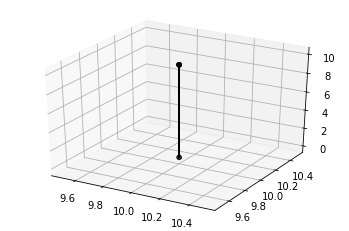

In [3]:
camera_origin = np.array([10,10,10])
plane_origin = np.array([0,0,0])
normal = np.array([0,0,1])

directions = np.array([[0,0,20], [0,0,1], [0,0,0.1], [0,0,-1]])

fig = plt.figure()
ax = plt.axes(projection='3d')

for direction in directions:
    intersects, p = intersect(camera_origin, direction, plane_origin, normal)
    
    if intersects:
        plot(camera_origin, p, ax)
    else:
        print("Do not intersect")

## Putting it to the test

We can test our slope theory by passing in the valueS

    directions = np.array([[0,1,1],[0,0,1]])
    
Here we would expect to see a straing line and a 45 degree line from the origin. 
    

Camera [10 10 10] with direction [0 1 1] intersects the plane at [10.  0.  0.]. Orthogonal value is 1
Camera [10 10 10] with direction [0 0 1] intersects the plane at [10. 10.  0.]. Orthogonal value is 1


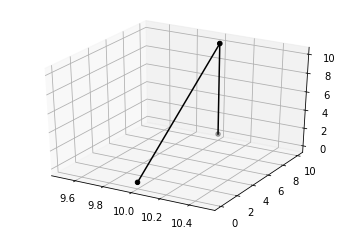

In [4]:
camera_origin = np.array([10,10,10])
plane_origin = np.array([0,0,0])
normal = np.array([0,0,1])

directions = np.array([[0,1,1],[0,0,1]])

fig = plt.figure()
ax = plt.axes(projection='3d')

for direction in directions:
    intersects, p = intersect(camera_origin, direction, plane_origin, normal)
    
    if intersects:
        plot(camera_origin, p, ax)
    else:
        print("Do not intersect")

## Having some fun
Now that we know how to manipulte the direction of the ray, we can start having some fun.

Camera [10 10 10] with direction [-1 -1  1] intersects the plane at [20. 20.  0.]. Orthogonal value is 1
Camera [10 10 10] with direction [ 1 -1  1] intersects the plane at [ 0. 20.  0.]. Orthogonal value is 1
Camera [10 10 10] with direction [-1  1  1] intersects the plane at [20.  0.  0.]. Orthogonal value is 1
Camera [10 10 10] with direction [1 1 1] intersects the plane at [0. 0. 0.]. Orthogonal value is 1


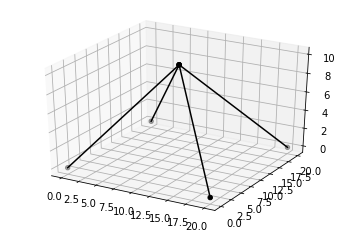

In [5]:
camera_origin = np.array([10,10,10])
plane_origin = np.array([0,0,0])
normal = np.array([0,0,1])

directions = np.array([[-1,-1,1], [1,-1,1], [-1,1,1],[1,1,1]])

fig = plt.figure()
ax = plt.axes(projection='3d')

for direction in directions:
    intersects, p = intersect(camera_origin, direction, plane_origin, normal)
    
    if intersects:
        plot(camera_origin, p, ax)
    else:
        print("Do not intersect")

## Calculating FOV of DJI X5S Camera

Lets use what we've learned to calculate the four corners of the FOV of a drone.

In this scenario we have a drone at an altitude of 121.92 meters (400 ft) with an X5S camera pointing straight down. 

The X5S camera has a focal length $f$ of 15.1282 mm with pixel dimensions $p_{x,y}$ of 5280 x 3965. Knowing the pixel size $p_{\mu}$ of 3.31439, we can compute the FOV. 

First we need to get the sensor dimensions in $mm$.

$w,h=(p_{\mu}*0.001)*p_{x,y}$

Then we can calculate the field of view $FOV$ in the horizontal and vertical direction.

$FOV_{h}=2*\arctan( \frac{w*0.5}{f}*\frac{180}{\pi})$

$FOV_{v}=2*\arctan( \frac{h*0.5}{f}*\frac{180}{\pi})$

In [6]:
f = 15 
pixel_size = 3.31439 #micrometers
pixels_height = 3956
pixels_width = 5280
            
pixelmm = pixel_size * 0.001

sensor_height = pixels_height * pixelmm; #13.11172684
sensor_width = pixels_width * pixelmm; #17.4999792

pi = math.pi;

horizontal_fov = 2 * math.atan(sensor_width * 0.5 / f) * (180/pi); 
vertical_fov = 2 * math.atan(sensor_height * 0.5 / f) * (180/pi);

# Used for development. 
#horizontal_fov = 57.6;
#vertical_fov = 43.2;

print(f"The camera has an FOV of {horizontal_fov} by {vertical_fov}")

The camera has an FOV of 60.51281504817404 by 47.21619401533894


With the FOV we can calculate the direction of the rays. 

$(\tan(\frac{fov_{h}}{2}),\tan(\frac{fov_{v}}{2}), 1)$

$(-\tan(\frac{fov_{h}}{2}),\tan(\frac{fov_{v}}{2}), 1)$

$(\tan(\frac{fov_{h}}{2}),-\tan(\frac{fov_{v}}{2}), 1)$

$(\tan(\frac{fov_{h}}{2}),-\tan(\frac{fov_{v}}{2}), 1)$

0.583332640.4370575613333333
Camera [  0.     0.   121.92] with direction [0.58333264 0.43705756 1.        ] intersects the plane at [-71.11991547 -53.28605788   0.        ]. Orthogonal value is 1.0
Camera [  0.     0.   121.92] with direction [-0.58333264  0.43705756  1.        ] intersects the plane at [ 71.11991547 -53.28605788   0.        ]. Orthogonal value is 1.0
Camera [  0.     0.   121.92] with direction [ 0.58333264 -0.43705756  1.        ] intersects the plane at [-71.11991547  53.28605788   0.        ]. Orthogonal value is 1.0
Camera [  0.     0.   121.92] with direction [-0.58333264 -0.43705756  1.        ] intersects the plane at [71.11991547 53.28605788  0.        ]. Orthogonal value is 1.0


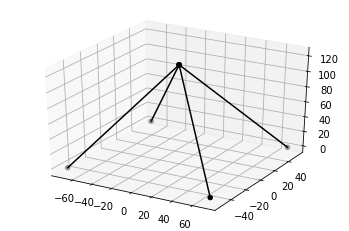

In [7]:
# Output should be in radians
horizontal = math.tan((horizontal_fov / 2)*(math.pi/180))
vertical = math.tan((vertical_fov / 2)*(math.pi/180))
print(f"{horizontal}{vertical}")

directions = np.array([[horizontal, vertical, 1],
                       [-horizontal, vertical, 1], 
                       [horizontal, -vertical, 1], 
                       [-horizontal, -vertical, 1]])

camera_origin = np.array([0,0,121.92])
plane_origin = np.array([0,0,0])
normal = np.array([0,0,1])

fig = plt.figure()
ax = plt.axes(projection='3d')

intersections = []
for direction in directions:
    intersects, p = intersect(camera_origin, direction, plane_origin, normal)
    
    if intersects:
        plot(camera_origin, p, ax)
        intersections.append(p)
    else:
        print("Do not intersect")

Per the DJI documentation the camera has a ratio of 4:3, so lets test if our four corners have the same ratio.

The distance between $(x_1, y_1)$ and $(x_2, y_2)$ is given by

$d=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$

In [8]:
# Line 1
d0_x1 = intersections[2][0]
d0_y1 = intersections[2][1]
d0_x2 = intersections[0][0]
d0_y2 = intersections[0][1]

# Line 2
d1_x1 = intersections[2][0]
d1_y1 = intersections[2][1]
d1_x2 = intersections[3][0] 
d1_y2 = intersections[3][1]

distance_0 = math.sqrt( ((d0_x2-d0_x1)**2)+((d0_y2-d0_y1)**2) )
distance_1 = math.sqrt( ((d1_x2-d1_x1)**2)+((d1_y2-d1_y1)**2) )

print(distance_0)
print(distance_1)
if distance_0 > distance_1:
    print(distance_0 / distance_1)
else:
    print(distance_1 / distance_0)
print(4/3)

106.57211575551999
142.2398309376
1.334681496461072
1.3333333333333333


## The World Isn't Flat
So far we have use a plane with a normal of $[0, 0, 1]$ or a flat surface with up in the $z$ direction. 

As, we know, or some of us know, the world isn't flat. In this next section, we work on calculating the 
plane normal of different surfaces and putting our ray intersect method to test on these surfaces. 

Camera [  0.     0.   121.92] with direction [0.58333264 0.43705756 1.        ] intersects the plane at [-75.40277869 -56.4949607   -7.34205996]. Orthogonal value is -37728.007750933335
Camera [  0.     0.   121.92] with direction [-0.58333264  0.43705756  1.        ] intersects the plane at [ 78.3086292  -58.67214718 -12.3235239 ]. Orthogonal value is -36328.00941493333
Camera [  0.     0.   121.92] with direction [ 0.58333264 -0.43705756  1.        ] intersects the plane at [-65.14007218  48.80570559  10.25117212]. Orthogonal value is -43671.99058506667
Camera [  0.     0.   121.92] with direction [-0.58333264 -0.43705756  1.        ] intersects the plane at [67.29743424 50.42209278  6.55283275]. Orthogonal value is -42271.992249066665


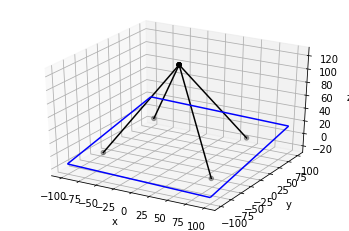

In [85]:
# We need an additional library. 
from random import randint

# Setup our plot.
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(xlabel='x', ylabel='y', zlabel='z')


z0 = randint(10,40)
z1 = randint(10,40)
# Let's create some data.
data = np.array([[[-100,100,z0],
                  [100,100,z1]],
                 [[-100,-100,-z1],
                  [100,-100,-z0]]])

x,y,z = data.T
ax.plot_wireframe(x, y, z, color='blue')

# Calculate plane normal
a = data[0][0]
b = data[0][1]
c = data[1][0]
ab = np.subtract(data[0][0], data[0][1])
ac = np.subtract(data[0][0], data[1][0])
n = np.cross(ab, ac)

intersections = []
for direction in directions:
    intersects, p = intersect(camera_origin, direction, plane_origin, n)
    
    if intersects:
        plot(camera_origin, p, ax)
        intersections.append(p)
    else:
        print("Do not intersect")


## Simulating Adding Elevetation

Camera [  0.     0.   121.92] with direction [0.58333264 0.43705756 1.        ] intersects the plane at [-71.11991547 -53.28605788   0.        ]. Orthogonal value is 1.0
Camera [  0.     0.   121.92] with direction [-0.58333264  0.43705756  1.        ] intersects the plane at [ 71.11991547 -53.28605788   0.        ]. Orthogonal value is 1.0
Camera [  0.     0.   121.92] with direction [ 0.58333264 -0.43705756  1.        ] intersects the plane at [-71.11991547  53.28605788   0.        ]. Orthogonal value is 1.0
Camera [  0.     0.   121.92] with direction [-0.58333264 -0.43705756  1.        ] intersects the plane at [71.11991547 53.28605788  0.        ]. Orthogonal value is 1.0


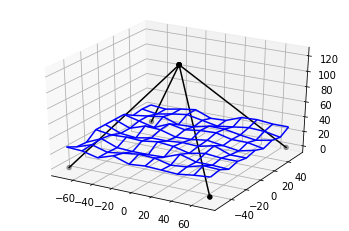

In [9]:
# Output should be in radians
horizontal = math.tan((horizontal_fov / 2)*(math.pi/180))
vertical = math.tan((vertical_fov / 2)*(math.pi/180))

directions = np.array([[horizontal, vertical, 1],
                       [-horizontal, vertical, 1], 
                       [horizontal, -vertical, 1], 
                       [-horizontal, -vertical, 1]])

camera_origin = np.array([0,0,121.92])
plane_origin = np.array([0,0,0])
normal = np.array([0,0,1])

fig = plt.figure()
ax = plt.axes(projection='3d')

intersections = []
for direction in directions:
    intersects, p = intersect(camera_origin, direction, plane_origin, normal)
    
    if intersects:
        plot(camera_origin, p, ax)
        intersections.append(p)
    else:
        print("Do not intersect")

        
# We need an additional library. 
from random import randint

# Let's create some data.
x = np.linspace(-72, 72, 10)
y = np.linspace(-54, 54, 10)
X, Y = np.meshgrid(x, y)

# Let's create some random elevations
Z = np.copy(X)
for row in Z:
    for index, cell in enumerate(row):
        row[index] = randint(20, 30)

ax.plot_wireframe(X, Y, Z, color='blue')

# Same info as above, just in a different format. [[x,y,z]]
dem = np.stack((X,Y,Z), axis=-1)

#start = np.array([0,0,121.92])
#while np.array_equal(start,  [-71.11991547, -53.28605788, 0]) == False:
#    camera_origin = np.add(camera_origin, [-0.58333264, -0.43705756, -1])
#    print(camera_origin)
    

# Rotation Matrix

Now that we can plot the four corners of the drone image when the gimbal is pointed straight down. Let's see if we incorporate the gimbal yaw, pitch, and roll. 